# Лабораторная работа 5 - векторизация текста

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
from catboost import CatBoostRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import math

c:\users\vsevo\pycharmprojects\facultativsocmedia\venv\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
data = pd.read_csv('data_preprocessed.csv')
data.index = data.id_post
data = data.dropna()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 480545 to 461098
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_post            2998 non-null   int64 
 1   data               2998 non-null   int64 
 2   text               2998 non-null   object
 3   likes              2998 non-null   int64 
 4   text_preprocessed  2998 non-null   object
dtypes: int64(3), object(2)
memory usage: 140.5+ KB


In [4]:
data = data.loc[data.likes > 50]

## Обработка таргета

<Axes: xlabel='likes', ylabel='Count'>

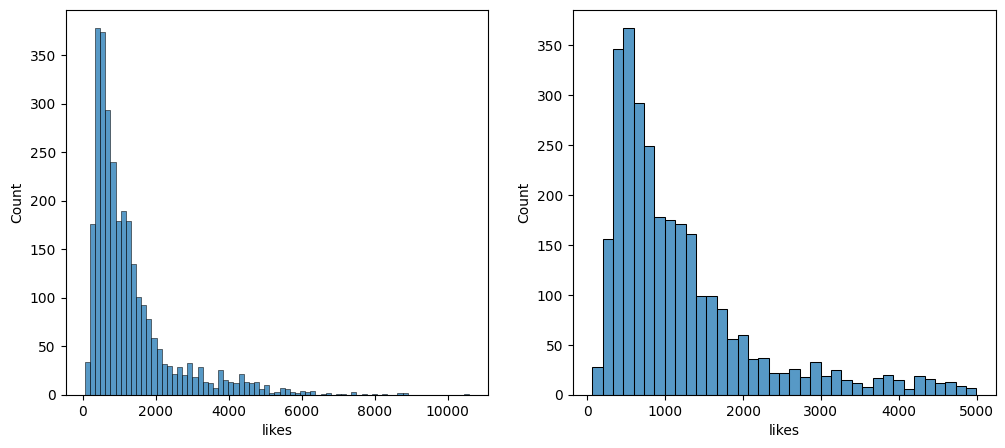

In [5]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)
sns.histplot(data.likes, ax = ax [0])
sns.histplot(data.likes.loc[data.likes < 5000])

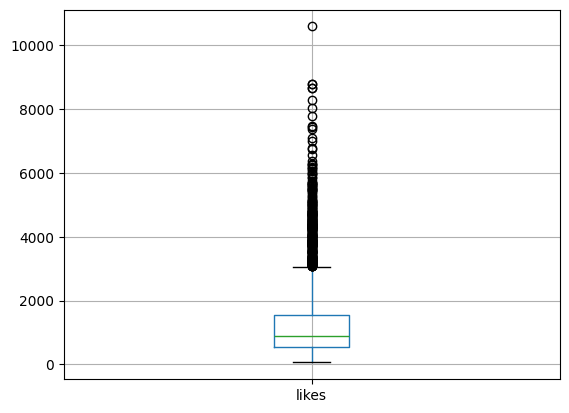

In [6]:
boxplot = data.boxplot(column=['likes'])

In [7]:
data = data.loc[data.likes <= 5000]

Попробуем перейти от лог нормального распределения к нормальному

In [8]:
data['likes_norm'] = data['likes'].apply(np.log)

<Axes: xlabel='likes_norm', ylabel='Count'>

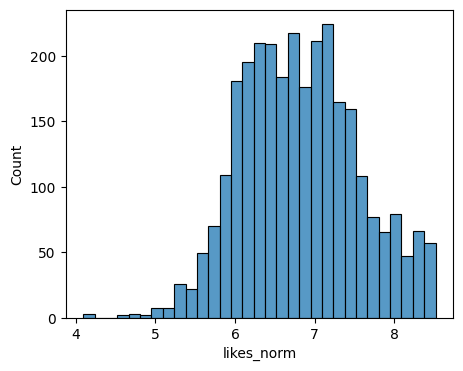

In [9]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(5)
sns.histplot(data.likes_norm)

## TF-IDF

In [10]:
vectorizer = TfidfVectorizer(max_df = 0.1, min_df = 10)
vectorizer.fit(data['text_preprocessed'])
print (len(vectorizer.get_feature_names_out()))

1534


In [11]:
vectorizer.get_feature_names_out()[:100]

array(['000', '10', '100', '11', '12', '14', '15', '150', '16', '17',
       '18', '19', '20', '24', '25', '30', '40', '50', 'extra', 'gosling',
       'https', 'hет', 'hу', 'me', 'myfavoritejumoreski', 'of', 'ryan',
       'the', 'to', 'you', 'автобус', 'автомат', 'автомобиль', 'ад',
       'адвокат', 'аж', 'александр', 'алексей', 'алло', 'америка',
       'американец', 'американский', 'анализ', 'английски', 'английский',
       'англичанин', 'анек', 'анекдот', 'аниме', 'анимешник', 'аптека',
       'арбуз', 'армия', 'армянин', 'армянский', 'аудитория', 'африка',
       'ах', 'баба', 'бабка', 'бабушка', 'бакс', 'бал', 'банк', 'бар',
       'барабан', 'бармен', 'бац', 'бедный', 'бежать', 'белый', 'берег',
       'берет', 'бизнес', 'билет', 'бить', 'благодарить', 'близкий',
       'блин', 'блондинка', 'бля', 'блядь', 'бог', 'богатый', 'боец',
       'бой', 'бокс', 'болеть', 'больница', 'больной', 'больший',
       'большой', 'бомж', 'бордель', 'борода', 'боцман', 'бояться',
       'брат

In [12]:
X = vectorizer.transform(data['text_preprocessed'])
y = data['likes']

## Эмбеддинги

In [13]:
model = SentenceTransformer('sentence-transformers/multi-qa-mpnet-base-cos-v1')

c:\users\vsevo\pycharmprojects\facultativsocmedia\venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [14]:
X_embed = []

for i in tqdm(data['text_preprocessed']):
    X_embed.append(model.encode(i))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2930/2930 [30:53<00:00,  1.58it/s]


In [15]:
data['embedding'] = X_embed

# Лабораторная работа 6 - обучение регрессора

## Регрессор

In [16]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

In [17]:
X_train, X_test = train['embedding'].tolist(), test['embedding'].tolist()
y_train, y_test = train['likes_norm'], test['likes_norm']

In [18]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [19]:
mean_absolute_percentage_error(math.e**(y_test.values), math.e**(reg.predict(X_test)))

1.099584312191615

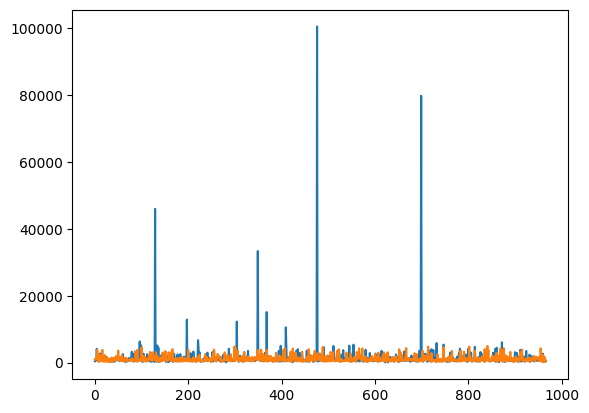

In [20]:
plt.plot(math.e**reg.predict(X_test))
plt.plot(math.e**y_test.values)

In [21]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
mean_absolute_percentage_error(math.e**(y_test.values), math.e**(regressor.predict(X_test)))

1.0260322622295082

## Заряжаем тяжелую артиллерию

In [22]:
reg = CatBoostRegressor(random_state=0)

In [23]:
reg.fit(X_train, y_train)

Learning rate set to 0.045547
0:	learn: 0.7384509	total: 359ms	remaining: 5m 58s
1:	learn: 0.7337766	total: 437ms	remaining: 3m 37s
2:	learn: 0.7300870	total: 512ms	remaining: 2m 50s
3:	learn: 0.7265230	total: 589ms	remaining: 2m 26s
4:	learn: 0.7234025	total: 665ms	remaining: 2m 12s
5:	learn: 0.7199710	total: 742ms	remaining: 2m 2s
6:	learn: 0.7171040	total: 817ms	remaining: 1m 55s
7:	learn: 0.7137089	total: 891ms	remaining: 1m 50s
8:	learn: 0.7105399	total: 969ms	remaining: 1m 46s
9:	learn: 0.7075035	total: 1.04s	remaining: 1m 43s
10:	learn: 0.7045776	total: 1.12s	remaining: 1m 40s
11:	learn: 0.7017583	total: 1.2s	remaining: 1m 38s
12:	learn: 0.6989462	total: 1.27s	remaining: 1m 36s
13:	learn: 0.6958036	total: 1.34s	remaining: 1m 34s
14:	learn: 0.6929977	total: 1.42s	remaining: 1m 33s
15:	learn: 0.6904575	total: 1.5s	remaining: 1m 32s
16:	learn: 0.6872728	total: 1.58s	remaining: 1m 31s
17:	learn: 0.6847904	total: 1.65s	remaining: 1m 30s
18:	learn: 0.6822181	total: 1.73s	remaining: 1m

In [24]:
mean_absolute_percentage_error(math.e**(y_test.values), math.e**(reg.predict(X_test)))

0.63061406692407

# Лабораторная 7 - подбор гиперпараметров

In [29]:
import optuna

In [32]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size = 0.1)

    param = {
        "objective": trial.suggest_categorical("objective", ["MAPE", "Poisson", 'RMSE']),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = CatBoostRegressor(**param)
    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)
    preds = gbm.predict(valid_x)
    accuracy = mean_absolute_percentage_error(math.e**(y_test.values), math.e**(gbm.predict(X_test)))
    
    return accuracy

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, timeout=600)

[I 2024-05-31 17:49:33,605] A new study created in memory with name: no-name-3d66de06-0685-4a8b-b54b-c02584ff4faf
[I 2024-05-31 17:49:44,286] Trial 0 finished with value: 0.6201932729216871 and parameters: {'objective': 'MAPE', 'colsample_bylevel': 0.07954000453461138, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.4591813290077456}. Best is trial 0 with value: 0.6201932729216871.
[I 2024-05-31 17:49:52,171] Trial 1 finished with value: 0.6041096329231089 and parameters: {'objective': 'MAPE', 'colsample_bylevel': 0.015585282525726702, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 4.455881914608062}. Best is trial 1 with value: 0.6041096329231089.
